Carregando as bibliotecas que será necessário nesse projeto.

In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization

Carregando o banco de dados.


In [124]:
DADOS = pd.read_csv('winequality.csv')
DADOS.head()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_is_red
0,0,5.9,0.61,0.08,2.1,0.071,16.0,24.0,0.99376,3.56,0.77,11.1,6,1
1,1,8.2,1.00,0.09,2.3,0.065,7.0,37.0,0.99685,3.32,0.55,9.0,6,1
2,2,6.4,0.24,0.49,5.8,0.053,25.0,120.0,0.99420,3.01,0.98,10.5,6,0
3,3,6.6,0.23,0.26,1.3,0.045,16.0,128.0,0.99340,3.36,0.60,10.0,6,0
4,4,7.2,0.24,0.29,3.0,0.036,17.0,117.0,0.99411,3.36,0.68,10.1,6,0


Limpando o banco de dados;

In [125]:
DADOS=DADOS.drop('Unnamed: 0',axis=1)
DADOS.dropna()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_is_red
0,5.9,0.61,0.08,2.1,0.071,16.0,24.0,0.99376,3.56,0.77,11.1,6,1
1,8.2,1.00,0.09,2.3,0.065,7.0,37.0,0.99685,3.32,0.55,9.0,6,1
2,6.4,0.24,0.49,5.8,0.053,25.0,120.0,0.99420,3.01,0.98,10.5,6,0
3,6.6,0.23,0.26,1.3,0.045,16.0,128.0,0.99340,3.36,0.60,10.0,6,0
4,7.2,0.24,0.29,3.0,0.036,17.0,117.0,0.99411,3.36,0.68,10.1,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,7.7,0.32,0.62,10.6,0.036,56.0,153.0,0.99780,3.13,0.44,8.9,6,0
6493,6.2,0.22,0.28,2.2,0.040,24.0,125.0,0.99170,3.19,0.48,10.5,6,0
6494,7.9,0.33,0.28,31.6,0.053,35.0,176.0,1.01030,3.15,0.38,8.8,6,0
6495,7.0,0.30,0.28,2.2,0.042,21.0,177.0,0.99166,3.20,0.57,11.4,5,0


Verificando como estão sendo consideradas as variáveis

In [126]:
DADOS.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
wine_is_red               int64
dtype: object

A marioria das variáveis são quantitativas continuas, então podemos calcular algumas medidas.

In [127]:
DADOS.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_is_red
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


Renomeando as váriaveis para o português.

In [128]:
DADOS = DADOS.rename(columns={'fixed acidity': 'Acidez fixa', 'volatile acidity': 'Acidez volátil', 
                               'citric acid': 'Acido Citrico','residual sugar':'Acucar residual',
                               'chlorides':'Cloretos','free sulfur dioxide':'Dioxido de enxofre livre',
                               'total sulfur dioxide':'Total dioxido de enxofre','density':'Densidade',
                               'pH':'PH','sulphates':'Sulfatos','alcohol':'Alcool','quality':'Qualidade',
                                'wine_is_red':'Vinho' })
print (DADOS)

      Acidez fixa  Acidez volátil  Acido Citrico  Acucar residual  Cloretos  \
0             5.9            0.61           0.08              2.1     0.071   
1             8.2            1.00           0.09              2.3     0.065   
2             6.4            0.24           0.49              5.8     0.053   
3             6.6            0.23           0.26              1.3     0.045   
4             7.2            0.24           0.29              3.0     0.036   
...           ...             ...            ...              ...       ...   
6492          7.7            0.32           0.62             10.6     0.036   
6493          6.2            0.22           0.28              2.2     0.040   
6494          7.9            0.33           0.28             31.6     0.053   
6495          7.0            0.30           0.28              2.2     0.042   
6496          6.4            0.22           0.49              7.5     0.054   

      Dioxido de enxofre livre  Total dioxido de en

Criação do gráfico Histograma;

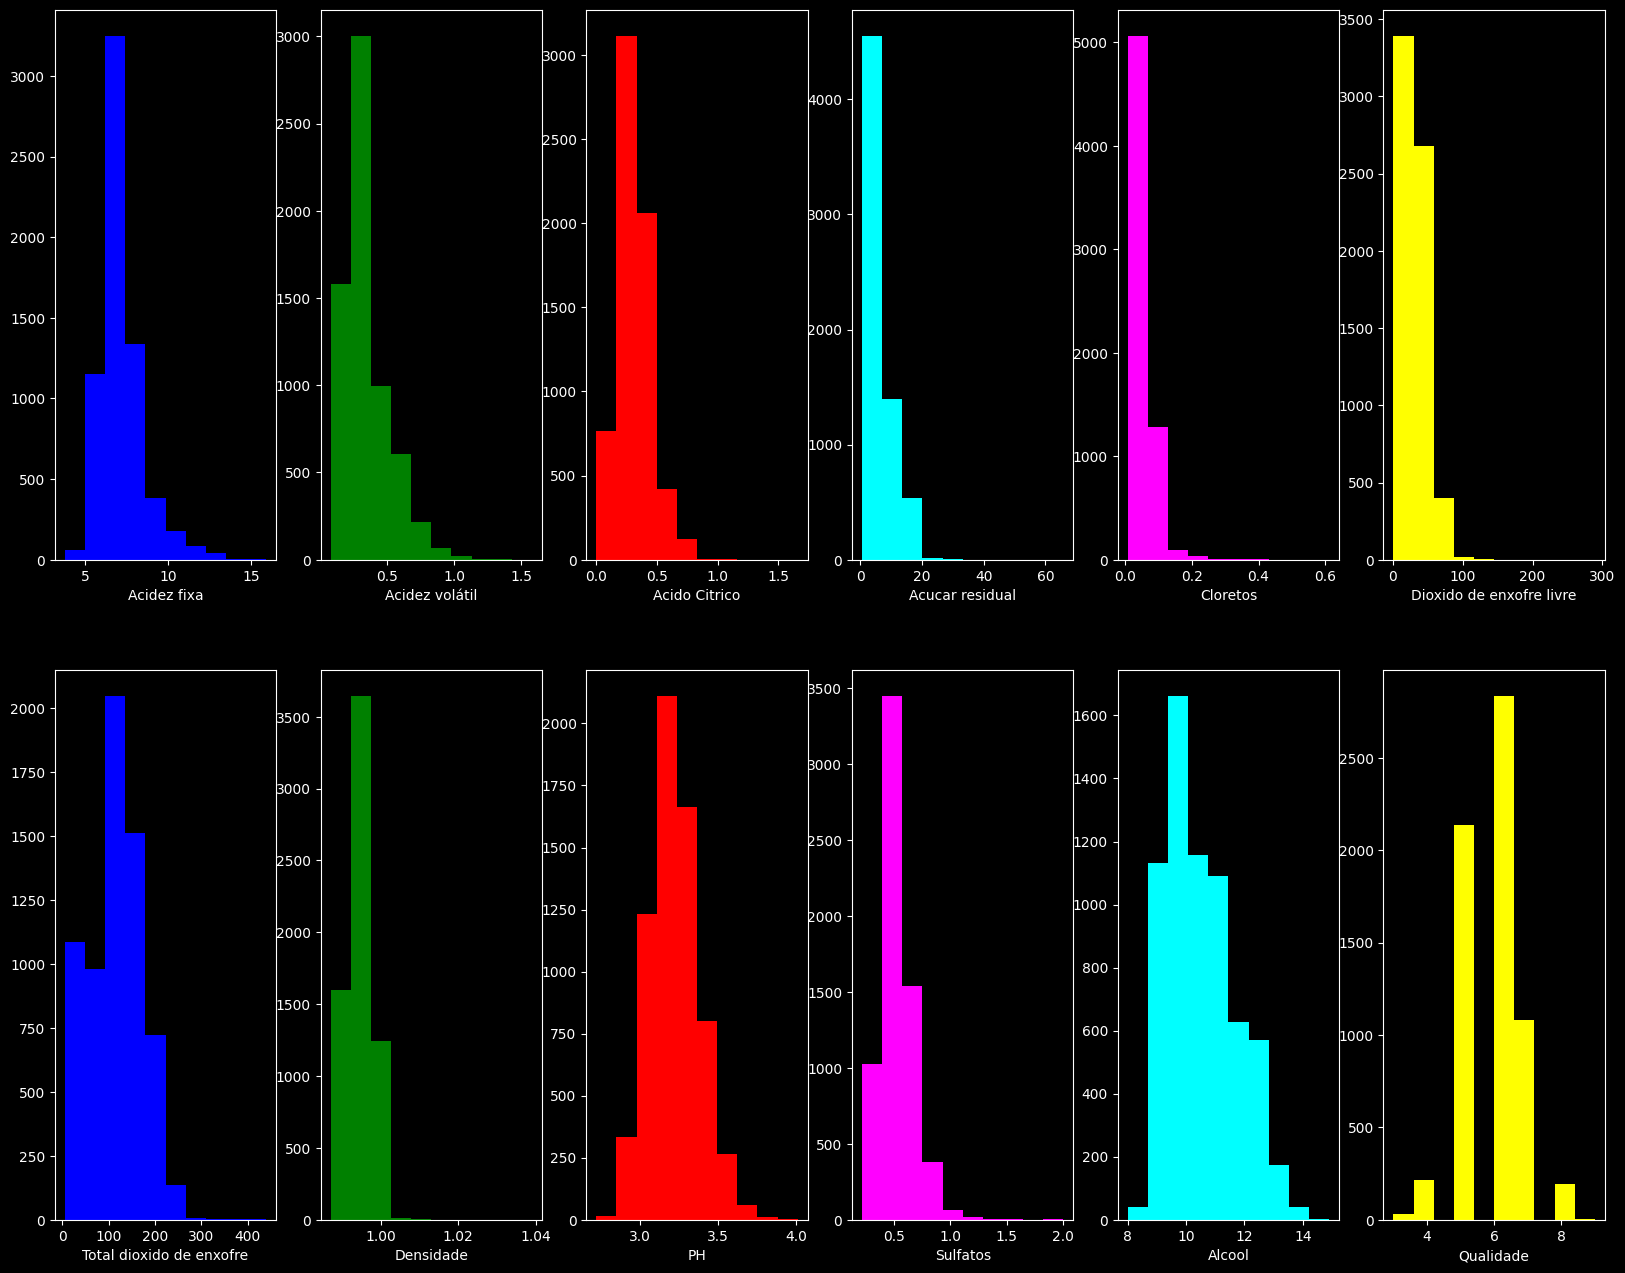

In [ ]:
plt.style.use('dark_background')
colors=['blue','green','red','cyan','magenta','yellow','blue','green','red','magenta','cyan','yellow']
plt.figure(figsize=(20,50))
for i in range(1,13):
    plt.subplot(6,6,i)
    plt.hist(DADOS[DADOS.columns[i-1]],color=colors[i-1])
    plt.xlabel(DADOS.columns[i-1])
plt.show()

Calcular a correlação de Pearson entre PH X Alcool
 

In [ ]:
correlation = DADOS['PH'].corr(DADOS['Alcool'])
print(f"A correlação de Pearson entre PH e Qualidade é: {correlation}")

A correlação de Pearson entre PH e Qualidade é: 0.12124846709220169


É uma correlação fraca entre essas duas varíaveis;


Gráfico de dispersão da correlação entre as váriaveis.

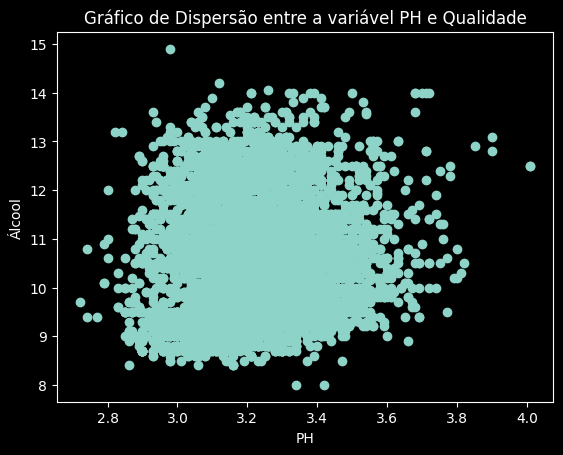

In [ ]:
# Escolhendo as colunas relevantes para o gráfico de dispersão
x = DADOS['PH']
y = DADOS['Alcool']

plt.scatter(x,y)
plt.title('Gráfico de Dispersão entre a variável PH e Qualidade')
plt.xlabel('PH')
plt.ylabel('Álcool')
plt.show()

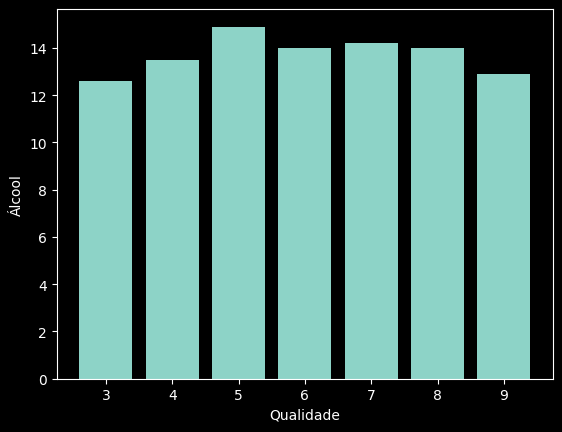

In [ ]:
plt.bar(DADOS['quality'], DADOS['alcohol'])
plt.xlabel('Qualidade')
plt.ylabel('Álcool')
plt.show()

Gráfico de Seaborn: são usados para mostrar a relação entre diferentes características presentes no conjunto de dados.

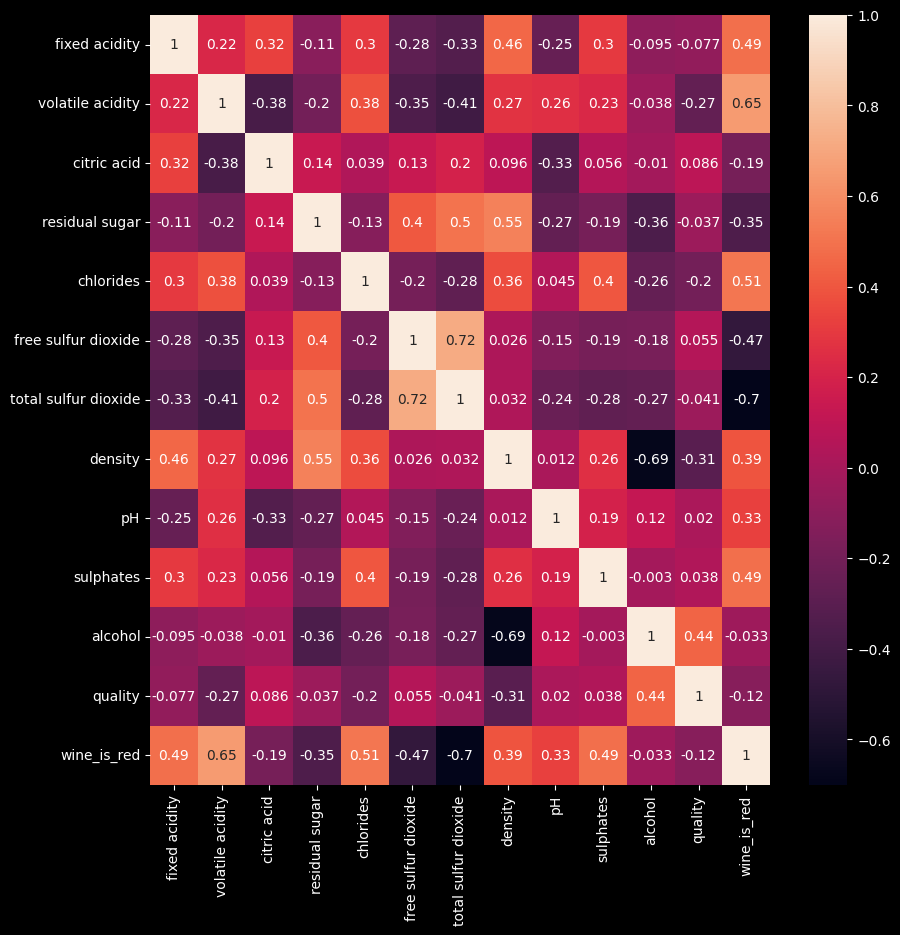

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,10))
correlations = DADOS[DADOS.columns].corr(method='pearson')
sns.heatmap(correlations, annot = True)
plt.show()

Atividade, parte 02:
Importação da biblioteca 

Classificação binária para prever se o vinho é tinto ou não;

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Carregando o banco de dados
wine_data = pd.read_csv('winequality.csv')

# Separar as características (features) e a variável alvo (target)
X = wine_data.drop('wine_is_red', axis=1)
y = wine_data['wine_is_red']

# Dividir o conjunto de dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar uma instância do classificador de regressão logística
model = LogisticRegression()

# Treinar o modelo
model.fit(X_train, y_train)

# Fazer previsões usando o modelo
y_pred = model.predict(X_test)


# Avaliar a acurácia do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia:", accuracy)


Acurácia: 0.9515384615384616


c:\Users\patym\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Implementação de um KNN;

In [ ]:

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# features e target
X = wine_data.drop('wine_is_red', axis=1)
y = wine_data['wine_is_red']

# treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y)

# instanciando o modelo
model = KNeighborsClassifier()

# treinando o modelo utilizando o conjunto de treino
model.fit(X_train,y_train)

# validando o modelo utilizando o conjunto de teste
accuracy = str(round(model.score(X_test,y_test) * 100, 2))+"%"

# imprimindo o resultado
print("A acurácia do modelo k-NN foi",accuracy)

# remove warnings
import warnings
warnings.filterwarnings("ignore")

scores = []
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X,y)
    model = KNeighborsClassifier()
    model.fit(X_train,y_train)
    accuracy = model.score(X_test,y_test)
    scores.append(accuracy)
    
print("Média: {:.2f}%".format(np.mean(scores)*100))
print("Desvio padrão: {:.2f}%".format(np.std(scores)*100))


A acurácia do modelo k-NN foi 92.12%
Média: 91.81%
Desvio padrão: 0.59%


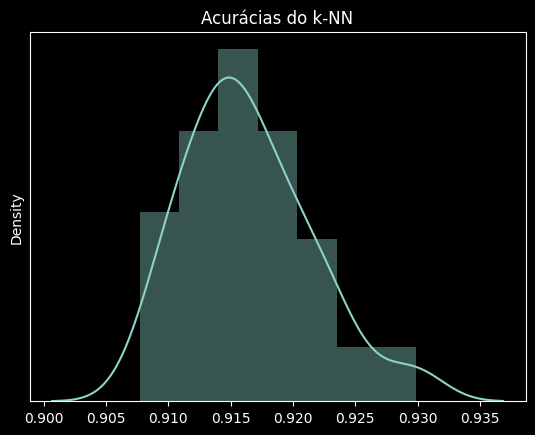

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(scores)
plt.yticks([])
plt.title("Acurácias do k-NN")
plt.show()

Matriz de confusão;

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# remove warnings
import warnings
warnings.filterwarnings("ignore")

# features e target
X = wine_data.drop('wine_is_red', axis=1)
y = wine_data['wine_is_red']

# treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y)

# treinando o modelo
model = KNeighborsClassifier()
model.fit(X_train,y_train)

# predizendo o teste
y_pred = model.predict(X_test)

# comparando predição com o real
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1236
           1       0.87      0.78      0.82       389

    accuracy                           0.92      1625
   macro avg       0.90      0.87      0.89      1625
weighted avg       0.92      0.92      0.92      1625



Interação para escolher o melhor número de vizinhos;

In [ ]:
# bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import Normalizer

# remove warnings
import warnings
warnings.filterwarnings("ignore")

# features e target
X = wine_data.drop('wine_is_red', axis=1)
y = wine_data['wine_is_red']


mean_scores = []
for k in range(1,21):
    scores = []
    for i in range(30):
        X_train, X_test, y_train, y_test = train_test_split(X,y)
        model = KNeighborsClassifier(n_neighbors=k)
        model.fit(X_train,y_train)
        accuracy = model.score(X_test,y_test)
        scores.append(accuracy)
    mean_scores.append(np.mean(scores))

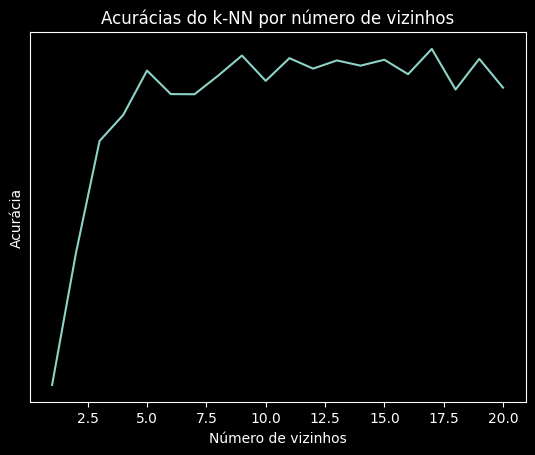

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(np.arange(1,21),mean_scores)
plt.yticks([])
plt.title("Acurácias do k-NN por número de vizinhos")
plt.xlabel("Número de vizinhos")
plt.ylabel("Acurácia")
plt.show()

Normalização dos dados;

In [ ]:
# bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import Normalizer
import numpy as np

# remove warnings
import warnings
warnings.filterwarnings("ignore")

# features e target
X = wine_data.drop('wine_is_red', axis=1)
y = wine_data['wine_is_red']

# normalizando
scaler = Normalizer()
scaler.fit(X)
X = scaler.transform(X)

scores = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X,y)
    model = KNeighborsClassifier()
    model.fit(X_train,y_train)
    accuracy = model.score(X_test,y_test)
    scores.append(accuracy)
    
print("Média: {:.2f}%".format(np.mean(scores)*100))
print("Desvio padrão: {:.2f}%".format(np.std(scores)*100))


Média: 92.79%
Desvio padrão: 0.57%


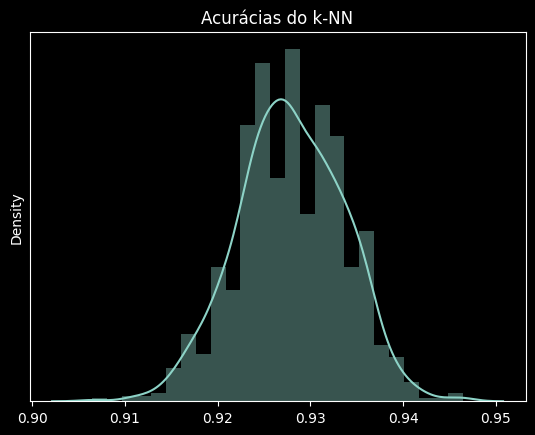

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(scores)
plt.yticks([])
plt.title("Acurácias do k-NN")
plt.show()

Houve uma diferença pequena com a normalização dos dados;

Métrica;

In [130]:
# bibliotecas
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import Normalizer
import numpy as np

# remove warnings
import warnings
warnings.filterwarnings("ignore")

# features e target
X = wine_data.drop('wine_is_red', axis=1)
y = wine_data['wine_is_red']

scores = []
for i in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X,y)
    model = KNeighborsClassifier(metric='canberra')
    model.fit(X_train,y_train)
    accuracy = model.score(X_test,y_test)
    scores.append(accuracy)
    
print("Média: {:.2f}%".format(np.mean(scores)*100))
print("Desvio padrão: {:.2f}%".format(np.std(scores)*100))

Média: 98.89%
Desvio padrão: 0.24%


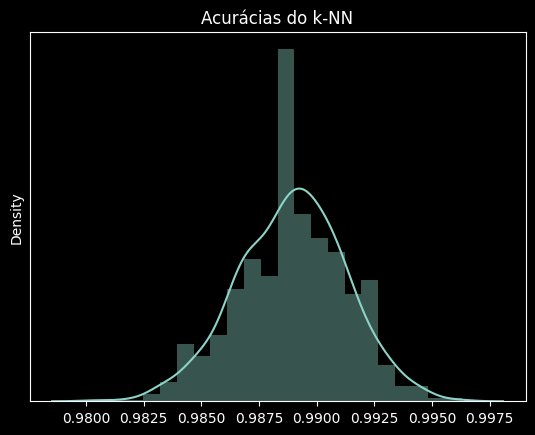

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.distplot(scores)
plt.yticks([])
plt.title("Acurácias do k-NN")
plt.show()

A média aumentou e o desvio padrão diminuiu, ou seja, teve menor variabilidade nos dados.

Implementação KNN, com a biblioteca numpy.

In [11]:
import numpy as np

# Função para calcular a distância euclidiana entre dois pontos
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

# Função KNN
def knn(X_train, y_train, X_test, k=3):
    num_test = X_test.shape[0]
    y_pred = np.zeros(num_test)

    for i in range(num_test):
        # Calcular distâncias entre o ponto de teste e todos os pontos de treinamento
        distances = np.array([euclidean_distance(X_test[i], x) for x in X_train])

        # Encontrar os índices dos K pontos mais próximos
        k_indices = np.argsort(distances)[:k]

        # Obter as classes dos K pontos mais próximos
        k_nearest_classes = y_train[k_indices]

        # Votar na classe majoritária entre os K vizinhos
        y_pred[i] = np.bincount(k_nearest_classes).argmax()

    return y_pred.astype(int)



In [17]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from collections import Counter

# Carregar o conjunto de dados
wine_data = datasets.load_wine()
X = wine_data.data
y = wine_data.target

# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Função para calcular a distância euclidiana
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def predict(self, X):
        predicted_labels = [self._predict(x) for x in X]
        return np.array(predicted_labels)

    def _predict(self, x):
        # Calcular distâncias
        distances = [euclidean_distance(x, x_train) for x_train in self.X_train]
        # Obter os k primeiros exemplos
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]
        # Maioria de votos
        most_common = Counter(k_nearest_labels).most_common(1)
        return most_common[0][0]


KNN accuracy: 0.75


In [19]:

# Testar a função KNN
k = 50
clf = KNN(k=k)
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
accuracy = np.sum(predictions == y_test) / len(y_test)
print("A acurácia do modelo k-NN foi:", accuracy)


A acurácia do modelo k-NN foi: 0.8055555555555556


CONCLUÇÃO: é esperado que o valor do KNN feito pelo biblioteca numpy seja menor,comparado com da biblioteca visto que das bibliotecas é otimizado.

Classificação multiclasse para prever a qualidade do vinho;

In [ ]:
import pandas as pd
from sklearn.svm import SVC

In [ ]:

# Dividir os dados em características (X) e variável alvo (y)
X = wine_data.drop('quality', axis=1)
y = wine_data['quality']

# # Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar as caracteristicas
X_train = (X_train - X_train.mean()) / X_train.std()
X_test = (X_test - X_test.mean()) / X_test.std()

# Criação e treinamento do modelo SVM (Máquina de Vetores de Suporte)
model = SVC()
model.fit(X_train, y_train)

# Fazendo previsões no conjunto de teste
y_pred = model.predict(X_test)

#  Avaliando a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print("Acurácia é de:", accuracy)

Acurácia é de: 0.5761538461538461


Aplicação do algoritmo Random Forest;

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC= RandomForestClassifier(n_estimators=200)
RFC.fit(X_train, y_train)
y_pred = RFC.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print('A acurácia desse modelo é de {:.2f}% '.format(accuracy*100))

A acurácia desse modelo é de 68.54% 


Com base neste modelo de previsão da qualidade do vinho, conseguimos determinar a qualidade do vinho com uma precisão aproximada de 69,23%. Esse tipo de modelo pode ser utilizado para encontrar a qualidade de qualquer outro produto ao configurar um conjunto de dados relevante para esse produto específico e, assim, prever a sua qualidade.